In [1]:
import torch
import torchvision

import torch.nn as nn
import math

import numpy as np

from SRNet import PSNet, NSDataset, ToTensor, train_net, display_state, SRNet, HFNet, HFDataset

In [2]:
GPU = True

# Model

In [27]:
net = HFNet(num_res_blocks=3)
if GPU:
    net = net.cuda()


# Dataloader

In [28]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

import h5py

In [29]:
sr_data = h5py.File('SR4_Data_bc.h5','r')

In [30]:
training_data = sr_data['training_data']
print(training_data.shape)

(400, 4, 128, 128)


### Input Data

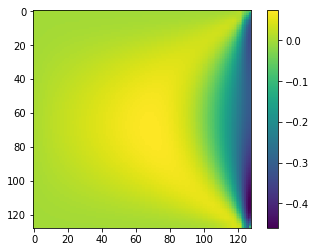

In [31]:
plt.imshow(sr_data['training_data'][0,0])
plt.colorbar()

### Initial Net results

In [80]:
#traindata = NSDataset(sr_data,ToTensor())

In [32]:
transform = ToTensor()#transforms.Compose([ToTensor(),Normalize(means=np.zeros(4),stds=[1,1,1e-3,1e-3])])
traindata = NSDataset(sr_data,transform)

In [33]:
trainloader = DataLoader(traindata,batch_size=6,shuffle=True)

# Train

In [34]:
train_net(net,trainloader,num_epochs=30,GPU=GPU,save_epoch=5)

	[1,     6] loss: 0.01237, 7.72 seconds elapsed
	[1,    12] loss: 0.00183, 15.42 seconds elapsed
	[1,    18] loss: 0.00114, 23.07 seconds elapsed
	[1,    24] loss: 0.00112, 30.73 seconds elapsed
	[1,    30] loss: 0.00074, 38.43 seconds elapsed
	[1,    36] loss: 0.00109, 46.09 seconds elapsed
	[1,    42] loss: 0.00063, 53.82 seconds elapsed
	[1,    48] loss: 0.00030, 61.47 seconds elapsed
	[1,    54] loss: 0.00045, 69.22 seconds elapsed
	[1,    60] loss: 0.00041, 76.86 seconds elapsed
	[1,    66] loss: 0.00036, 84.61 seconds elapsed
Epoch 1 Training Time: 85.48 seconds
Total Elapsed Time: 85.48 seconds
	[2,     6] loss: 0.00054, 7.69 seconds elapsed
	[2,    12] loss: 0.00033, 15.35 seconds elapsed
	[2,    18] loss: 0.00021, 23.01 seconds elapsed
	[2,    24] loss: 0.00031, 30.70 seconds elapsed
	[2,    30] loss: 0.00030, 38.36 seconds elapsed
	[2,    36] loss: 0.00033, 46.04 seconds elapsed
	[2,    42] loss: 0.00054, 53.72 seconds elapsed
	[2,    48] loss: 0.00021, 61.56 seconds elapsed


	[14,    36] loss: 0.00002, 47.27 seconds elapsed
	[14,    42] loss: 0.00003, 55.16 seconds elapsed
	[14,    48] loss: 0.00003, 63.12 seconds elapsed
	[14,    54] loss: 0.00004, 71.15 seconds elapsed
	[14,    60] loss: 0.00006, 79.15 seconds elapsed
	[14,    66] loss: 0.00002, 87.17 seconds elapsed
Epoch 14 Training Time: 88.08 seconds
Total Elapsed Time: 1242.18 seconds
	[15,     6] loss: 0.00003, 8.07 seconds elapsed
	[15,    12] loss: 0.00003, 16.23 seconds elapsed
	[15,    18] loss: 0.00002, 24.43 seconds elapsed
	[15,    24] loss: 0.00002, 32.49 seconds elapsed
	[15,    30] loss: 0.00003, 40.48 seconds elapsed
	[15,    36] loss: 0.00002, 48.60 seconds elapsed
	[15,    42] loss: 0.00002, 56.68 seconds elapsed
	[15,    48] loss: 0.00003, 64.84 seconds elapsed
	[15,    54] loss: 0.00002, 73.77 seconds elapsed
	[15,    60] loss: 0.00002, 82.28 seconds elapsed
	[15,    66] loss: 0.00002, 90.89 seconds elapsed
Epoch 15 Training Time: 91.76 seconds
Total Elapsed Time: 1333.95 seconds
	[1

	[27,    48] loss: 0.00001, 63.58 seconds elapsed
	[27,    54] loss: 0.00001, 71.53 seconds elapsed
	[27,    60] loss: 0.00001, 79.44 seconds elapsed
	[27,    66] loss: 0.00001, 87.36 seconds elapsed
Epoch 27 Training Time: 88.26 seconds
Total Elapsed Time: 2415.57 seconds
	[28,     6] loss: 0.00001, 7.92 seconds elapsed
	[28,    12] loss: 0.00001, 15.83 seconds elapsed
	[28,    18] loss: 0.00001, 23.75 seconds elapsed
	[28,    24] loss: 0.00001, 31.70 seconds elapsed
	[28,    30] loss: 0.00001, 39.63 seconds elapsed
	[28,    36] loss: 0.00001, 47.71 seconds elapsed
	[28,    42] loss: 0.00001, 55.83 seconds elapsed
	[28,    48] loss: 0.00001, 64.05 seconds elapsed
	[28,    54] loss: 0.00001, 72.18 seconds elapsed
	[28,    60] loss: 0.00002, 80.30 seconds elapsed
	[28,    66] loss: 0.00001, 88.39 seconds elapsed
Epoch 28 Training Time: 89.27 seconds
Total Elapsed Time: 2504.84 seconds
	[29,     6] loss: 0.00001, 7.84 seconds elapsed
	[29,    12] loss: 0.00001, 15.70 seconds elapsed
	[29

# Evaluate

In [68]:
# net = PSNet(num_res_blocks=5)
# checkpoint = torch.load('./weights/2018-09-20_10-46-17_unnormalized_PSLayer/epoch_50.weights')
# net.load_state_dict(checkpoint)
# if GPU:
#     net = net.cuda()

In [22]:
qtestdata = h5py.File('SR4_Data_no_bc.h5','r')
testdata = NSDataset(qtestdata,transform=transform)
testloader = DataLoader(testdata,batch_size=1,shuffle=False)
# #qtestinputs = qtestdata['training_data']
# qtestlabels = qtestdata['training_labels']

# LR_tensor = torch.Tensor(qtestlabels[:,:,::4,3::4])
# qtestinputs = nn.functional.upsample(LR_tensor,mode='bilinear',scale_factor=4).numpy()
# print(qtestinputs.shape)
# #print(np.power(HR_data-BIL_data,2).mean())

# qtestlabels -= qtestinputs

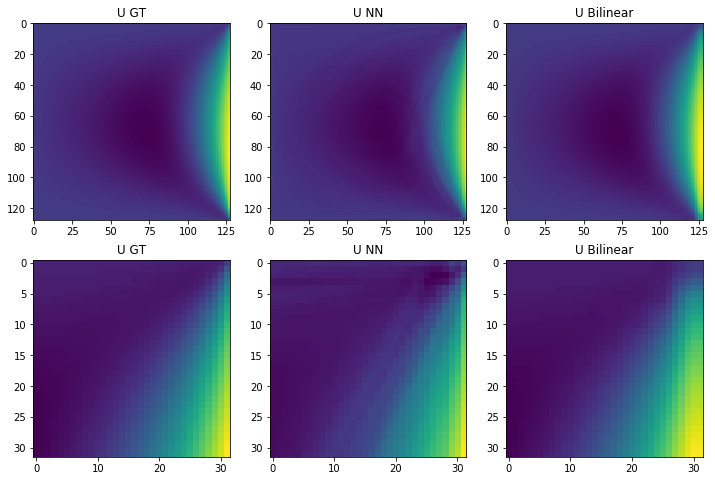

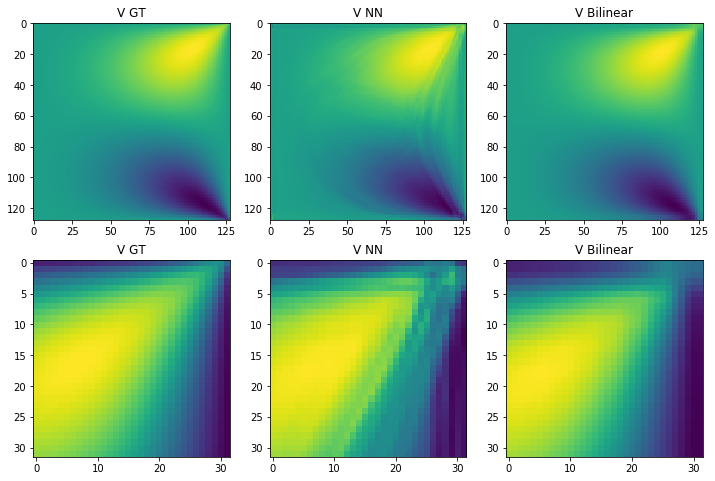

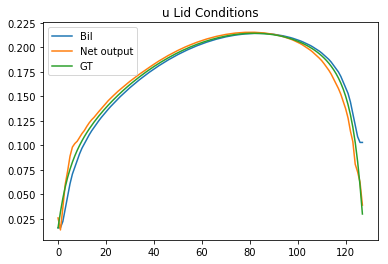

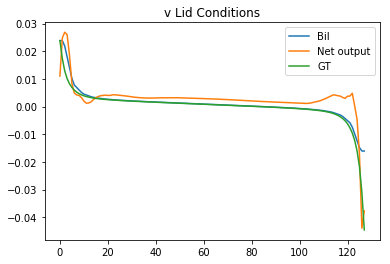

In [20]:
channels = ['U','V','Px','Py']
imgtype = ['GT', 'NN', 'Bilinear']
for sample in trainloader:
    data,label = sample
    label += data
    #display_state(nn.functional.upsample(data,scale_factor=2,mode='bilinear')[0,...])

    if GPU:
        output = net(data.cuda())[0,...].cpu().detach().numpy()
    else:
        output = net(data)[0,...].detach().numpy()
    bil = data[0,...].detach().numpy()
    output += bil
    label = label[0,...].detach().numpy()
    #bil = nn.functional.upsample(data,scale_factor=2,mode='bilinear')[0,...].detach().numpy()
    
    for j in range(2):
        plt.figure(figsize=(12,8))
        for i,img in enumerate([label,output, bil]):
            plt.subplot(2,3,i+1)
            plt.title(channels[j] + ' ' + imgtype[i])
            plt.imshow(img[j,...])

            plt.subplot(2,3,i+4)
            plt.title(channels[j] + ' ' + imgtype[i])
            plt.imshow(img[j,:32,-32:])
    
    
    #display_state(output.detach())
    for i,c in enumerate(['u','v']):
        plt.figure()
        plt.title(str(c) + ' Lid Conditions')
        plt.plot(bil[i,:,slice_idx],label='Bil')
        plt.plot(output[i,:,slice_idx],label='Net output')
        plt.plot(label[i,:,slice_idx],label='GT')
        plt.legend(loc=0)
    break

In [26]:
n = len(testloader)
mses = np.zeros((n,4))
bil_mses = np.zeros((n,4))

for i, sample in enumerate(testloader):
    data,label = sample
    label += data
    #display_state(nn.functional.upsample(data,scale_factor=2,mode='bilinear')[0,...])

    if GPU:
        output = net(data.cuda())[0,...].cpu().detach().numpy()
    else:
        output = net(data)[0,...].detach().numpy()
    bil = data[0,...].detach().numpy()
    #output += bil
    label = label[0,...].detach().numpy()
    
    mses[i] = np.mean(np.power(output-label,2),axis=(-1,-2))

    # Compare against bil
    bil_mses[i] = np.mean(np.power(label,2),axis=(-1,-2))

print('Channel\tNet Error\tBilinear')
for i,c in enumerate(['U','V','Px','Py']):
    print(c + '\t%.3fe-06\t%.3fe-06' % (mses[:,i].mean()*1e6, bil_mses[:,i].mean()*1e6))



Channel	Net Error	Bilinear
U	6830.575e-06	5382.804e-06
V	2318.651e-06	2375.589e-06
Px	22.394e-06	0.000e-06
Py	18.661e-06	0.001e-06


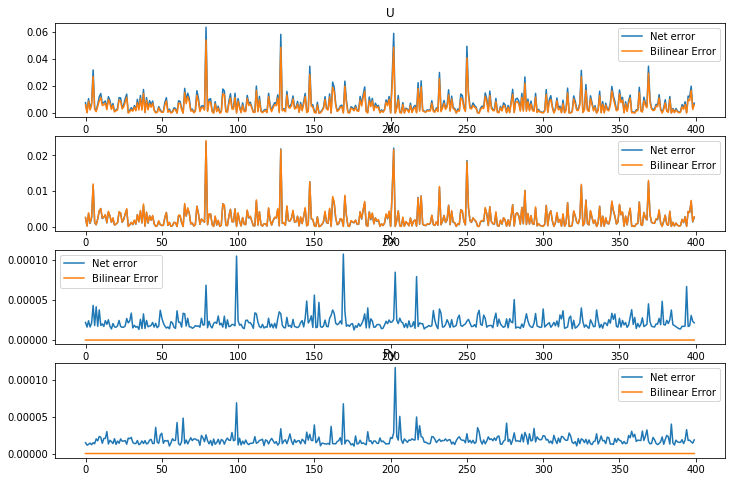

In [25]:
fig = plt.figure(figsize=(12,8))
fig.tight_layout()
channels = ['U','V','Px','Py']
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.plot(mses[:,i],label='Net error')
    plt.plot(bil_mses[:,i],label='Bilinear Error')
    plt.title(channels[i])
    plt.legend(loc=0)

plt.show()



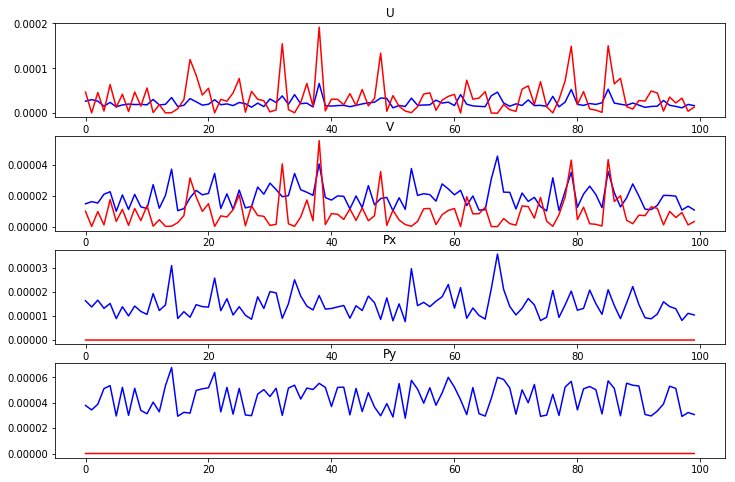

In [102]:
fig = plt.figure(figsize=(12,8))
fig.tight_layout()
channels = ['U','V','Px','Py']
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.plot(mses[:,i],'b')
    plt.plot(naive_mses[:,i],'r')
    plt.title(channels[i])
plt.show()

# Average MSE per Epoch

In [7]:
import os
import glob

In [16]:
def epoch_num(path):
    return path[path.rfind('_')+1:path.rfind('.')]

In [39]:
weights = glob.glob('./weights/2018-09-19_18-11-33_unnormalized_bil_50/*.weights')
epochs = [int(epoch_num(path)) for path in weights]
weights = np.array(weights)[np.argsort(epochs)]
print(weights)
epochs.sort()

['./weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_1.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_6.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_11.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_16.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_21.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_26.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_31.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_36.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_41.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_46.weights'
 './weights/2018-09-19_18-11-33_unnormalized_bil_50\\epoch_50.weights']


In [51]:
sr_data = h5py.File('SR_Datav2.h5','r')
qtestdata = h5py.File('SR_Test_Quad_Datav2.h5','r')


In [57]:
#qtestinputs = qtestdata['training_data']
#qtestlabels = qtestdata['training_labels']

transform = ToTensor()
testdata = NSDataset(qtestdata,transform)
testloader = DataLoader(testdata,batch_size=5,shuffle=False)
print(len(testdata),len(testloader))


traindata = NSDataset(sr_data,transform)
trainloader = DataLoader(traindata,batch_size=5,shuffle=False)
print(len(traindata),len(trainloader))


100 20
400 80


In [56]:
epoch_mses = np.zeros((len(epochs),4))
train_mses = np.zeros((len(epochs),4))

2

In [59]:

for idx in range(len(epochs)):
    print('Evaluating Epoch %i' % (epochs[idx]))
    net = SRNet(num_res_blocks=5)
    checkpoint = torch.load(weights[idx])

    net.load_state_dict(checkpoint)
    if GPU:
        net = net.cuda()

#     n = len(testloader)
#     mses = np.zeros((n,4))

#     for i, sample in enumerate(testloader):
#         data, label = sample
#         label = label.numpy()
#         # evaluate
#         if GPU:
#             output = net(data.cuda()).cpu().detach().numpy()
#         else:
#             output = net(data).detach().numpy()

#         mses[i] = np.mean(np.power(output-label,2),axis=(0,-1,-2))
#     epoch_mses[idx] = mses.mean(axis=0)
    
    n = len(trainloader)
    mses = np.zeros((n,4))

    for i, sample in enumerate(trainloader):
        data, label = sample
        label = label.numpy()
        # evaluate
        if GPU:
            output = net(data.cuda()).cpu().detach().numpy()
        else:
            output = net(data).detach().numpy()

        mses[i] = np.mean(np.power(output-label,2),axis=(0,-1,-2))
    train_mses[idx] = mses.mean(axis=0)

Evaluating Epoch 1


D:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Evaluating Epoch 6
Evaluating Epoch 11
Evaluating Epoch 16
Evaluating Epoch 21
Evaluating Epoch 26
Evaluating Epoch 31
Evaluating Epoch 36
Evaluating Epoch 41
Evaluating Epoch 46
Evaluating Epoch 50


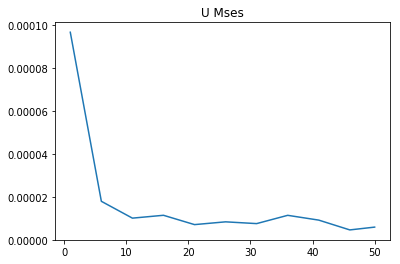

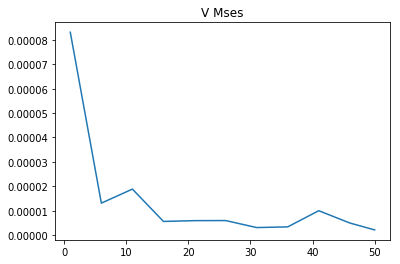

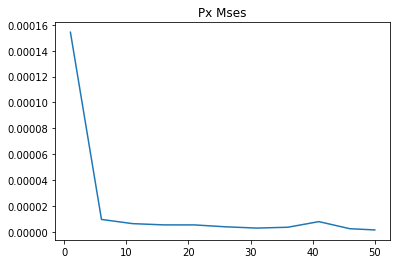

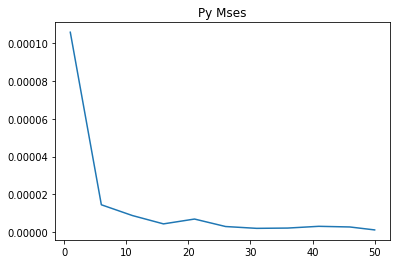

In [61]:
for i,c in enumerate(['U','V','Px','Py']):
    plt.figure()
    plt.title(c + ' Mses')
    plt.plot(epochs, train_mses[:,i])

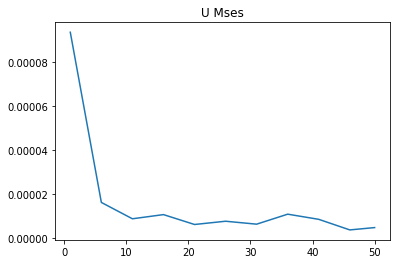

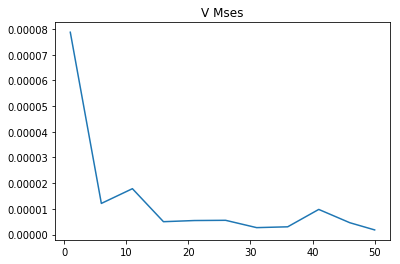

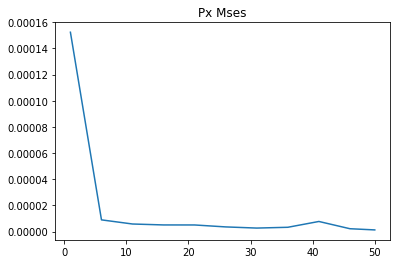

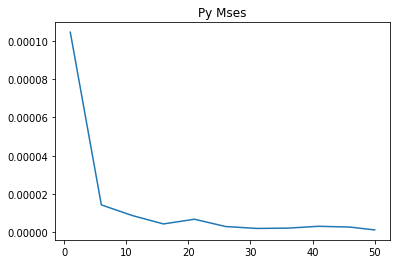

In [40]:
for i,c in enumerate(['U','V','Px','Py']):
    plt.figure()
    plt.title(c + ' Mses')
    plt.plot(epochs, epoch_mses[:,i])

D:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


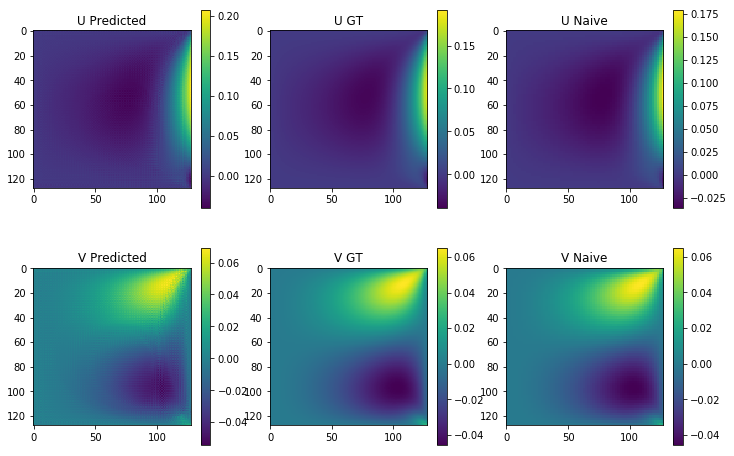

In [34]:
fig = plt.figure(figsize=(12,8))
#for i in range(n):
i = 3
data = torch.Tensor(qtestinputs[i])
labels = qtestlabels[i]
if GPU:
    output = net(data.cuda().unsqueeze(0))[0,...].cpu().detach().numpy()
else:
    output = net(data.unsqueeze(0))[0,...].detach().numpy()

plt.subplot(231)
plt.imshow(output[0])
plt.colorbar()
plt.title('U Predicted')

plt.subplot(232)
plt.imshow(labels[0])
plt.colorbar()
plt.title('U GT')

plt.subplot(233)
plt.imshow(np.kron(qtestinputs[i,0],np.ones((2,2))))
plt.colorbar()
plt.title('U Naive')


plt.subplot(234)
plt.imshow(output[1])
plt.colorbar()
plt.title('V Predicted')

plt.subplot(235)
plt.imshow(labels[1])
plt.colorbar()
plt.title('V GT')

plt.subplot(236)
plt.imshow(np.kron(qtestinputs[i,1],np.ones((2,2))))
plt.colorbar()
plt.title('V Naive')

plt.show()
